> ###  ***Submitted by: Malaika Ahmed***

# 🔴 ***Task 29: Hyperparameter Tuning Techniques***
When working on a machine learning project, selecting and fine-tuning the right model is essential for optimal performance. Common models from sklearn include Linear Regression for predicting continuous values, Logistic Regression for binary classification, and Decision Trees, Random Forests, SVMs, and KNNs for various classification and regression tasks. Hyperparameter tuning techniques such as Grid Search, Random Search, and Bayesian Optimization can be employed to find the best parameters for these models, enhancing their performance and predictive accuracy. Apply these techniques and note down the results to evaluate the impact of different models and hyperparameters on your dataset's performance.


***

***

 ## <span style='color:Blue'>  ***What is Hyperparameter Tuning?*** </span>

- Hyperparameters are the adjustable parameters that control the learning process of a machine learning model.
-  Hyperparameter tuning involves finding the optimal combination of hyperparameters that maximizes model performance while reducing the error margin. 
- Unlike model parameters that are learned from the data, hyperparameters are set prior to the training process. 
- Examples include the learning rate, number of hidden layers and units in a neural network, the number of trees in a random forest, and max depth in - Decision Tree. These hyperparameters have a direct effect on whether your model will be Underfitting or overfitting. 
- The Bias Variance trade-off is heavily rely on hyperparameter tuning. 

- Hyperparameter tuning, therefore, involves finding the optimal combination of hyperparameters that yields the best performance for a machine learning model. It’s akin to fine-tuning an engine for optimal efficiency and power output.



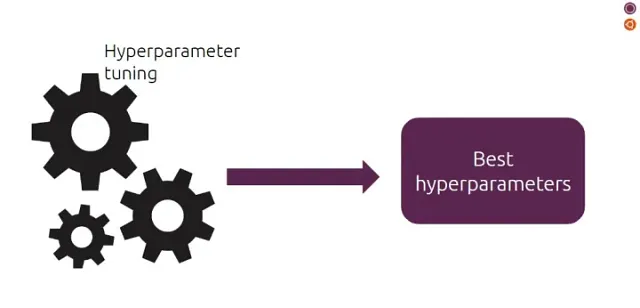

 ## <span style='color:Blue'>  ***Why Hyperparameter Tuning?*** </span>

The significance of hyperparameter tuning in ML can be summed up in three main points:

- Improving Model Performance: Properly tuned hyperparameters can significantly improve the performance of a model, making it more accurate and efficient.
- Model Generalization: It helps in preventing overfitting or underfitting, ensuring that the model generalizes well to new, unseen data.
- Resource Optimization: It aids in the efficient use of computational resources by identifying the most effective parameters for learning

 ## <span style='color:Blue'>  ***Common Approaches to Hyperparameter Tuning*** </span>

Several methods are widely used in the field of ML for hyperparameter tuning:

- ***Grid Search***: This method involves searching exhaustively through a specified subset of hyperparameters.
- ***Random Search***: Unlike grid search, random search randomly selects combinations and is often faster and more efficient.
- ***Bayesian Optimization:*** This approach models the objective function and selects hyperparameters to find the optimal solution in fewer steps.
- ***Automated Hyperparameter Tuning***: Tools like AutoML automate the process, using algorithms to optimize hyperparameters.

## <span style='color:Blue'>  ***Example of Hyperparameters***  </span>

Few hyperparameters of Random Forests:


- ***Max_depth***: The “max_depth” hyperparameter defines the maximum depth or level of each decision tree in the random forest. A deeper tree can capture intricate relationships and details in the training data, potentially leading to high accuracy. However, deep trees are prone to overfitting and may not generalize well to unseen test data. The default value of “max_depth” in Scikit-Learn is set to “None,” allowing the trees to expand until all leaves are pure or contain minimum samples.

- ***Max_features***: “Max_features” determines the maximum number of features considered for each split in the random forest model. At each node, the algorithm evaluates a subset of features and selects the best one for splitting. The default value of “max_features” in Scikit-Learn is the square root of the total number of features in the dataset. This default setting promotes diversity among the trees and helps prevent overfitting.

- ***N_estimators:*** The “n_estimators” hyperparameter specifies the number of decision trees in the random forest ensemble. Increasing the number of estimators generally improves model performance up to a certain point, where additional trees may provide diminishing returns. The default value of “n_estimators” in Scikit-Learn is 10, but it is often recommended to increase this value to achieve better model performance.

- ***Min_samples_leaf:*** “Min_samples_leaf” sets the minimum number of samples required to be present at a leaf node. If the number of samples at a node falls below this threshold, further splitting is halted, and the node becomes a leaf. A higher value of “min_samples_leaf” can prevent overfitting by ensuring that each leaf contains sufficient samples to make reliable predictions. The default value in Scikit-Learn is 1, meaning that a leaf can contain a single sample.

- ***Min_samples_split***: The “min_samples_split” hyperparameter determines the minimum number of samples required to split an internal node further. If the number of samples at a node is below this threshold, no further splitting is performed, and the node becomes a leaf. Setting a higher value for “min_samples_split” can prevent the tree from creating small branches with insufficient data. The default value in Scikit-Learn is 2, meaning that a node must have at least two samples to be eligible for splitting.


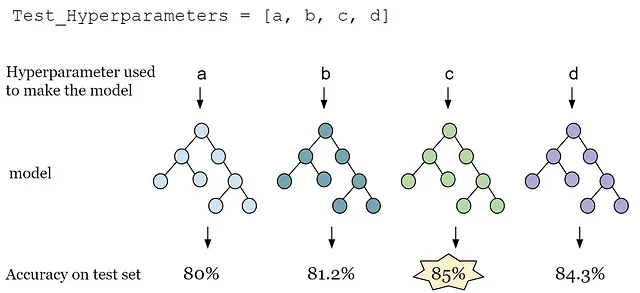

***

***

 # <span style='color:Red'>  ***1.  Grid Search*** </span>

### ***What is GridSearchCV?***
- GridSearchCV stands for Grid Search Cross-Validation,is a hyperparameter tuning technique that involves searching through a manually defined set of hyperparameter values for a machine learning algorithm.
-  It works by creating a grid of all possible combinations of hyperparameters and evaluating the performance of the model for each combination.for a given model.
-  It is a systematic approach to finding the best combination of hyperparameters for a given model.



### ***When to use Grid SearchCV?***
- When we have small dataset and we have to tune less hyper parameters,we may use GridSearchCV,since for large data set,GridSearchCV is computationally Extensive.


***

# <span style='color:Blue'>  ***Implementing GridSearchCV***  </span>




 ### ***Importing the Libraries***



In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


 ### ***Loading the dataset***


In [5]:
df = pd.read_csv('heart.csv')


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### ***Data Pre-Processing***

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

723

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

 ### ***Splitting input Features and target variable***


In [11]:
X=df.iloc[:,0:-1]

In [12]:
y=df.iloc[:,-1]

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

 ### ***Splitting data into training and testing***


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


 ### ***Making objects for model (without hypermaeters)***


In [16]:
rf = RandomForestClassifier()

### ***Training and checking accuracy of model***

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.8524590163934426

 ### ***Making objects for model (with hypermaeters)***


In [20]:
rf = RandomForestClassifier(max_samples=0.9,random_state=42)

In [21]:
rf.fit(X_train,y_train)


RandomForestClassifier(max_samples=0.9, random_state=42)

In [22]:
y_pred = rf.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.819672131147541

# <span style='color:Blue'>  ***Using GridSearchCV in Random Forest***  </span>

Using GridSearchCV will tell us which value of hyperparementers is best to use for  accurate model

### ***Giving Each hypermeter a specific value***

In [34]:
# Number of trees in random forest
# Deciion Tress (4)
n_estimators = [20,60,100,120]

# Number of features to consider at every split
# No of colums for each tree (3)
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Total 4*3*3*3=108 diff random forests will train

### ***Making a dictionary of hyperparameters***

In [35]:

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [36]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV


### ***Creating an object of GridSearchCV with hyperparameters***


In [37]:
# estimator tells which algorithm we want to run.Here we are using random forest 
# param_grid is dictionary that we created on which options we want to train the grid 
# cross validation cv=5, is telling to train each random forest 5 times (108*5)
# verbose=2: The function prints the number of folds and the parameters to be evaluated.
# n_jobs=-1, the grid search will utilize all available processors to perform the search in parallel, 
# which can significantly speed up the computation time for large datasets or complex models.

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

### ***Training the data in Grid Search***

In [38]:
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

### ***Finding best parameters in gridsearch***

In [29]:
rf_grid.best_params_


{'max_depth': 2, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 120}

### ***Finding best score in gridsearch***

In [30]:

rf_grid.best_score_


0.8465986394557824

## ***Visualizing Best Score Using GridSearch***

In [31]:


y_pred = rf_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


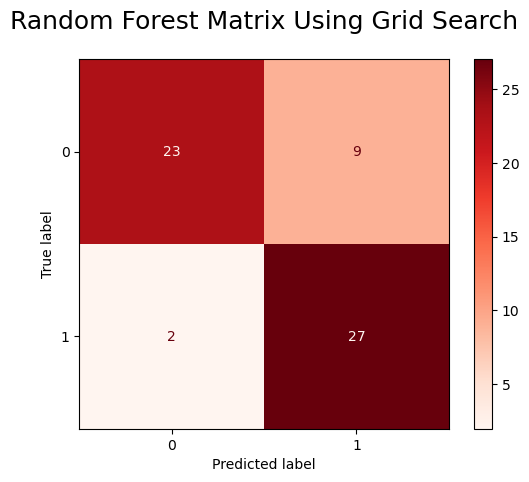

In [32]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Random Forest Matrix Using Grid Search",pad=22,fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Using GridSearchCV in Logistic Regresstion***  </span>


In [39]:
# Define the parameter grid for Logistic Regression

## Inverse of regularization strength.
# The value of C controls the trade-off between achieving a low training error and a low testing error (generalization). 
# A smaller value of C specifies stronger regularization.

# penalty specifies the norm used in the penalization (regularization) term. In logistic regression, its  L1 or L2 regularization.

# solver specifies the algorithm to use for optimization of the problem. 

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga']  
}


In [40]:
# Create the Logistic Regression model
LR = LogisticRegression()


In [41]:
# Create the GridSearchCV object
LR_grid = GridSearchCV(estimator=LR, 
                       param_grid=param_grid, 
                       cv=5, 
                       verbose=2, 
                       n_jobs=-1)

In [42]:

LR_grid.fit(X_train, y_train)




Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [43]:
print(LR_grid.best_params_)



{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
print(LR_grid.best_score_)


0.8422619047619048


In [46]:
y_pred = LR_grid.predict(X_test)


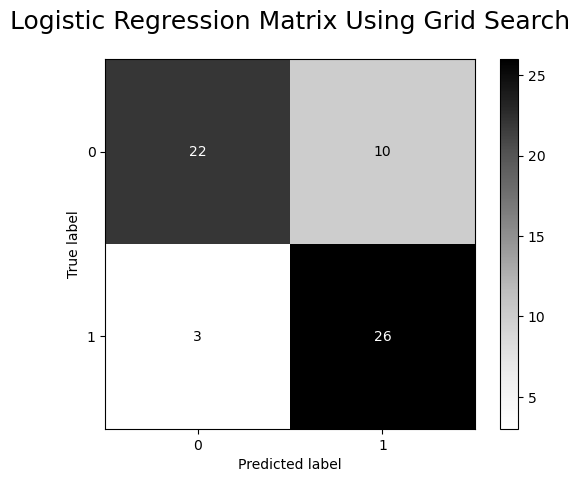

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.title("Logistic Regression Matrix Using Grid Search", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Using GridSearchCV in Decision Tree***  </span>


In [48]:

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}



In [49]:
# Create the Decision Tree model
DT = DecisionTreeClassifier()


In [50]:
# Create the GridSearchCV object
DT_grid = GridSearchCV(estimator=DT, 
                       param_grid=param_grid, 
                       cv=5, 
                       verbose=2, 
                       n_jobs=-1)



In [51]:
# Fit the model
DT_grid.fit(X_train, y_train)



Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

### ***Finding Best HyperParameters and Best Score Using Decision Trees***

In [52]:
# Output the best parameters and score
print(DT_grid.best_params_)
print(DT_grid.best_score_)



{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.7677721088435374


In [53]:
# Make predictions and visualize the confusion matrix
y_pred = DT_grid.predict(X_test)


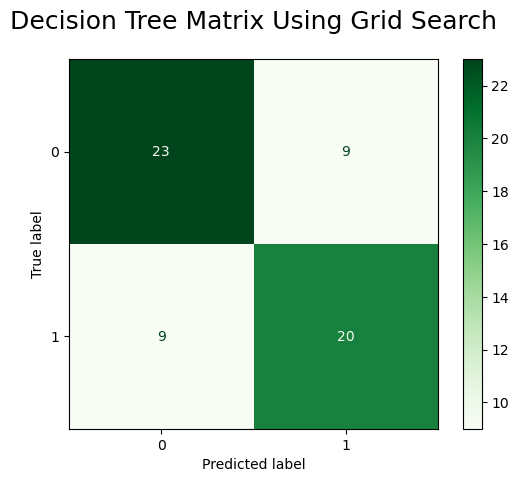

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Decision Tree Matrix Using Grid Search", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Using GridSearchCV in SVM***  </span>


In [55]:

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': ['scale', 'auto']         # Kernel coefficient
}


In [56]:
# Create the SVM model
SVM = SVC()



In [57]:
# Create the GridSearchCV object
SVM_grid = GridSearchCV(estimator=SVM, 
                        param_grid=param_grid, 
                        cv=5, 
                        verbose=2, 
                        n_jobs=-1)




In [58]:
# Fit the model
SVM_grid.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [59]:
# Output the best parameters and score
print(SVM_grid.best_params_)



{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [60]:
print(SVM_grid.best_score_)


0.8175170068027212


In [61]:
y_pred = SVM_grid.predict(X_test)


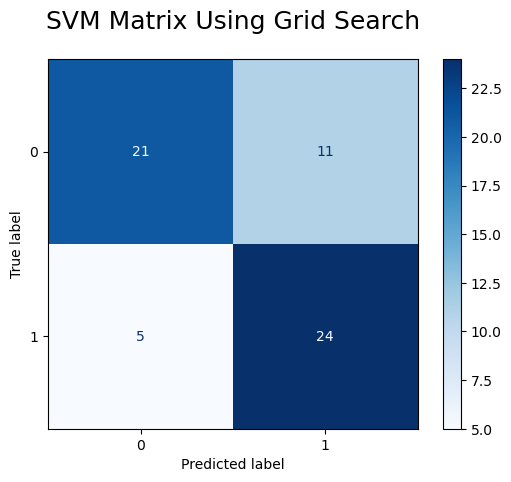

In [62]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Matrix Using Grid Search", pad=22, fontsize=18)
plt.show()

***

***

***

 # <span style='color:Red'>  ***2. Random Search*** </span>


### ***What is Random Search?***

Random search is a hyperparameter tuning technique used to optimize the performance of machine learning models. Like grid search, it involves searching over a predefined range of hyperparameters to find the optimal combination that yields the best performance on a validation set. However, unlike grid search, random search does not exhaustively search over all possible combinations, but instead randomly samples hyperparameters from the predefined range.



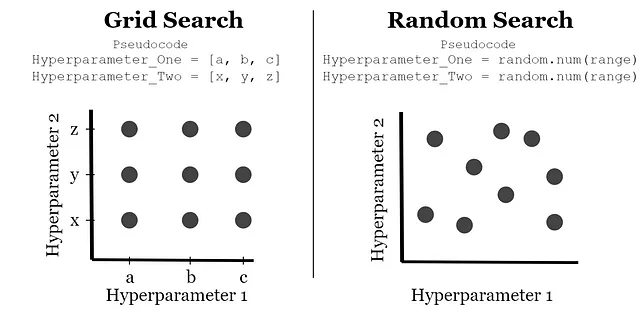

### ***How does it works?***

Randomized Search, as the name suggests, picks a parameter value at random from a range or list of possible values for a specific hyperparameter.

### ***When to use RandomSearchCV?***
- When we have large dataset,and we have to tune a lot of hyper parameters,Random search gives near to perfect answers

***

# <span style='color:Blue'>  ***Implementing Random SearchCV in Random Forest***  </span>



### ***Giving Each hypermeter a specific value***

In [63]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

### ***Making a dictionary of hyperparameters***

In [64]:
param_RS_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_RS_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


### ***Creating an object of RandomizedSearchCV with hyperparameters***

In [65]:
from sklearn.model_selection import RandomizedSearchCV

rf_RS_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_RS_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

### ***Training the data in Random Search***

In [66]:
rf_RS_grid.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, Fi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

### ***Finding best parameters in Random search***

In [67]:
rf_RS_grid.best_params_


{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

### ***Finding best score in random search***

In [68]:
rf_RS_grid.best_score_


0.8009353741496599

In [69]:
y_pred = rf_RS_grid.predict(X_test)


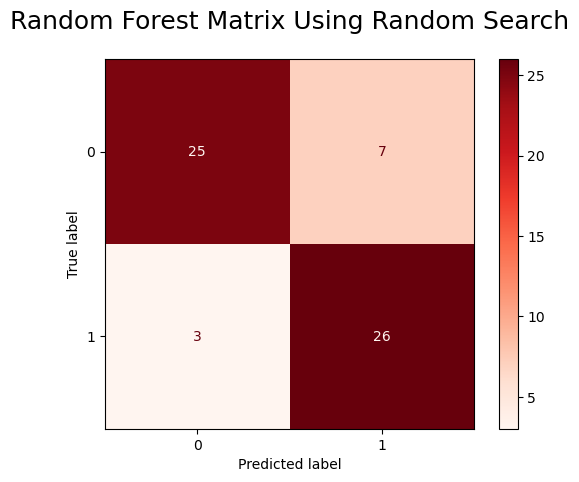

In [70]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Random Forest Matrix Using Random Search",pad=22,fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Random SearchCV in Decision Tree***  </span>


In [71]:


# Define the parameter grid for Decision Tree
param_RS_grid = {
    'max_depth': [2, 8, None],               # Maximum number of levels in tree
    'min_samples_split': [2, 5],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],              # Minimum number of samples required at each leaf node
    'max_features': [0.2, 0.6, 1.0]          # Number of features to consider at every split
}




In [72]:
# Create the Decision Tree model
DT = DecisionTreeClassifier()

# Create the RandomizedSearchCV object
DT_RS_grid = RandomizedSearchCV(estimator=DT, 
                                param_distributions=param_RS_grid, 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit the model
DT_RS_grid.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5]},
                   verbose=2)

In [73]:
# Finding best parameters and score
print(DT_RS_grid.best_params_)
print(DT_RS_grid.best_score_)



{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.2, 'max_depth': None}
0.7717687074829932


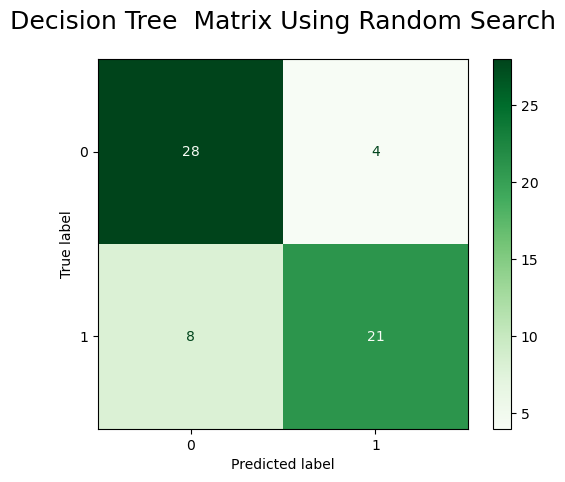

In [74]:
y_pred = DT_RS_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Decision Tree  Matrix Using Random Search", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Random SearchCV in Logistic Regression***  </span>


In [75]:

# Defining the Dictionary/parameter grid for Logistic Regression

param_RS_grid = {
    'C': [0.1, 1, 10, 100],               # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Norm used in the penalization
    'solver': ['liblinear', 'saga']       # Algorithm to use in the optimization problem
}



In [76]:

# Create the Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Create the RandomizedSearchCV object
LR_RS_grid = RandomizedSearchCV(estimator=LR, 
                                param_distributions=param_RS_grid, 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit the model
LR_RS_grid.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

In [77]:
# Finding best parameters and score
print(LR_RS_grid.best_params_)
print(LR_RS_grid.best_score_)



{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
0.8421768707482993


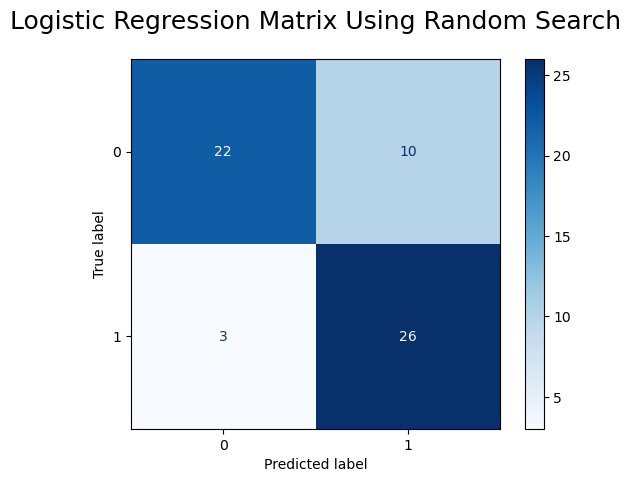

In [78]:
y_pred = LR_RS_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression Matrix Using Random Search", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Random SearchCV in SVM***  </span>



In [79]:

# Define the parameter grid for SVM
param_RS_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']            # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}




In [80]:
# Create the SVM model
SVM = SVC()

# Create the RandomizedSearchCV object
SVM_RS_grid = RandomizedSearchCV(estimator=SVM, 
                                 param_distributions=param_RS_grid, 
                                 cv=5, 
                                 verbose=2, 
                                 n_jobs=-1)

SVM_RS_grid.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=2)

In [81]:
# Finding best parameters and score
print(SVM_RS_grid.best_params_)
print(SVM_RS_grid.best_score_)



{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
0.8133503401360545


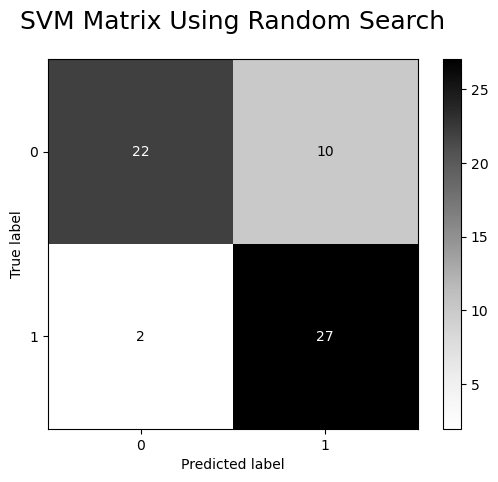

In [82]:
y_pred = SVM_RS_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.title("SVM Matrix Using Random Search", pad=22, fontsize=18)
plt.show()

***

***

***

 # <span style='color:Red'>  ***3. Bayesian Optimization*** </span>


### ***What is Optimization***?

In broad terms the concept of optimization is to find a set of parameters that minimize a cost function. This cost function is often too expensive to be evaluated repeatedly thus implying the need to minimize the number of evaluations before reaching the optimum.

### ***What is Bayesian Optimization***?

Bayesian optimization is a probabilistically principled method based on the Bayes theorem to find the global optimum of the black-box function.
What does this mean? If you know the ground-truth objective function such as f(x) = 0, we also know where the min and max values are. However, when we are using deep learning models, we can never know what the underlying objective function is. Therefore, all we could do is do lots of trial-and-error until either you get exhausted or your resource gets exhausted. However, no one wants either of these options! We want an intelligent way to explore the parameter space. Looking at the figures below, you can see how Bayesian optimization search finds global minimum with fewer iterations compared to other search methods.



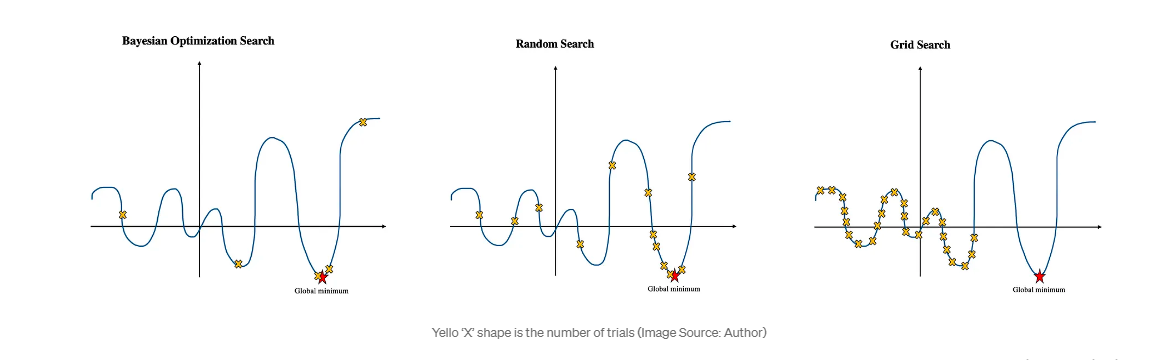

### ***Key Terminologies in  Bayesian optimization***

- ****Bayes Theorem (conditional probability of an event):***
> P(A|B) = P(B|A) * P(A) /P(B)
proportional quantity: P(A|B) = P(B|A) * P(A)

- Prior: Samples are drawn and will be evaluated with a random function. The outcome will be used to define the prior. The prior represents the behavior of the function.
- ***Posterior***: Posterior is the conditional probability (the reverse is called likelihood) assigned taking the priors into account. Thus, it is an approximation of the objective function and evaluates the cost of specific parameter configurations. The posterior becomes a prior as they are updated in the next iteration. Posterior is used in the acquisition function to determine the next points to sample in the search space that is most likely to return good results.
- ***The surrogate function*** is an approximation of the black-box objective function. A Gaussian process(Gaussian distribution and random process) operates as a surrogate function. The Gaussian process builds the probabilistic model of the objective function, assuming all random variables have a multivariate normal distribution. In short, utilizing the Gaussian process guides how to explore the parameter samples in the search space.
- ***Acquisition Function***: It determines the next query points from the parameter space. It uses exploration(where are optimal values? Let’s explore unknown areas or most uncertain areas) and exploitation(where is the optimal value? Let’s find points where it gives the highest value based on the previous result) strategy to guide selecting the next sample. The acquisition function tries to yield a good balance between exploration and exploitation. There are multiple ways to do this. “Expected Improvement (EI)” and “Maximum Probability of Improvement” are popular methods. In short, the acquisition function decides what to sample next.




### ***Steps in Bayesian Optimization***

1. ***Initial Sampling***: Start by randomly sampling a few points in the hyperparameter space (these are your initial points).
2. ***Build Surrogate Model:*** Use the initial points to build a surrogate model that approximates the objective function. This model predicts the performance of hyperparameter configurations. A Gaussian process is commonly used for this purpose that approximates the objective function based on the initial samples. In the example provided below, Keras Tuner abstracts away this step, so we haven’t explicitly built this.
3. ***Acquisition Function:*** Use an acquisition function to decide where to sample next. The acquisition function balances exploration (trying new configurations) and exploitation (refining known good configurations). This is a strategy for selecting the next hyperparameters to evaluate. Common choices include Expected Improvement (EI), Probability of Improvement (PI), and Upper Confidence Bound (UCB).
4. ***Evaluate and Update:*** Evaluate the objective function at the chosen point. Add this point to your data and update the surrogate model.
5. ***Iterate***: Repeat steps 3 and 4 until you reach the maximum number of trials or another stopping criterion.

***

# <span style='color:Blue'>  ***Implementing Bayesian Optimization in Random Forest***  </span>


In [83]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [84]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [85]:
model = RandomForestClassifier()


### ***Making a dictionary/search space of hyperparameters***

In [86]:
# Defining the search space
search_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'max_features': Real(0.1, 0.9)
}

### ***Creating an object of BayesSearchCV with hyperparameters***

In [87]:
# Defining the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=0,  # Set to 1 or 2 to see progress messages
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)

In [88]:
# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.1, high=0.9, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize')})

### ***Finding best parameters  in  Bayesian Optimization***

In [89]:
BP=bayes_search.best_params_

print("Best parameters using Bayesian Optimization :\n",BP)


Best parameters using Bayesian Optimization :
 OrderedDict([('max_depth', 10), ('max_features', 0.1), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 90)])


### ***Finding best score in  Bayesian Optimization***

In [90]:
BS=bayes_search.best_score_

print("Best cross-validation score Using Bayesian Optimization :", BS)

Best cross-validation score Using Bayesian Optimization : 0.821656378600823


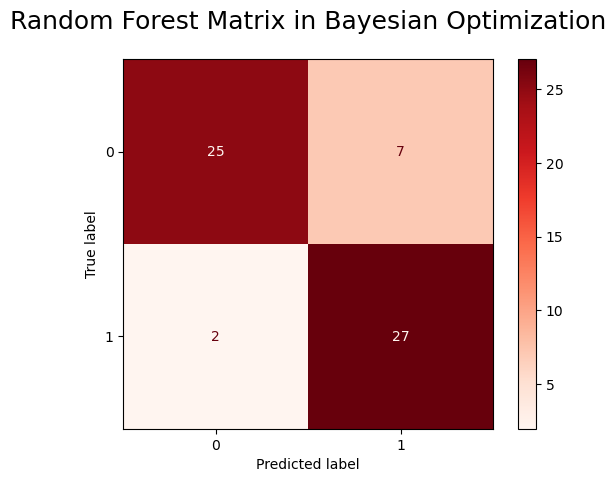

In [91]:
y_pred = bayes_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Random Forest Matrix in Bayesian Optimization",pad=22,fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Bayesian Optimization in Decision Tree***  </span>


In [92]:
# Defining  the search space for Decision Tree

search_space = {
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'max_features': Real(0.1, 0.9)
}



In [93]:
# Creating an object for the Decision Tree model
model = DecisionTreeClassifier()

# Defining the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=0,  # Set to 1 or 2 to see progress messages
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)

bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.1, high=0.9, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize')})

In [ ]:
BP = bayes_search.best_params_

print("Best parameters using Bayesian Optimization:\n", BP)
BS = bayes_search.best_score_

print("\n Best cross-validation score Using Bayesian Optimization:", BS)



In [ ]:
y_pred = bayes_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Decision Tree Matrix in Bayesian Optimization", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Bayesian Optimization in Logistic Regression***  </span>


In [ ]:

# Defining the Dictionary/search space for Logistic Regression

search_space = {
    'C': Real(0.01, 100.0, prior='log-uniform'),  # Inverse of regularization strength
    'penalty': Categorical(['l1', 'l2']),  # Norm used in the penalization
    'solver': Categorical(['liblinear', 'saga'])  # Algorithm to use in the optimization problem
}




In [ ]:
# Creating the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Defining the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=0,  # Set to 1 or 2 to see progress messages
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)

bayes_search.fit(X_train, y_train)


In [ ]:
BP = bayes_search.best_params_

print("Best parameters using Bayesian Optimization:\n", BP)
BS = bayes_search.best_score_

print("Best cross-validation score Using Bayesian Optimization:", BS)



In [ ]:
# Visualization
y_pred = bayes_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression Matrix Using Bayesian Optimization", pad=22, fontsize=18)
plt.show()

***

# <span style='color:Blue'>  ***Implementing Bayesian Optimization in SVM***  </span>


In [ ]:
# Define the Dictionary/search space for SVM

search_space = {
    'C': Real(0.01, 100.0, prior='log-uniform'),  # Regularization parameter
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
    'degree': Integer(2, 5),  # Degree of the polynomial kernel function (if 'poly')
    'gamma': Real(0.001, 1.0, prior='log-uniform'),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'coef0': Real(0.0, 1.0)  # Independent term in kernel function (for 'poly' and 'sigmoid')
}



In [ ]:
# Creating an object for the SVM model
model = SVC()

# Defining the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=0,  
    n_jobs=-1,  
    random_state=42
)

bayes_search.fit(X_train, y_train)


In [ ]:
BP = bayes_search.best_params_

print("Best parameters using Bayesian Optimization:\n", BP)
BS = bayes_search.best_score_

print("Best cross-validation score Using Bayesian Optimization:", BS)



In [ ]:
y_pred = bayes_search.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.title("SVM matrix Using Bayesian Optimization", pad=22, fontsize=18)
plt.show()

***